In [139]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import pandas_datareader.data as pdr
from cytoolz import sliding_window
import pickle
from itertools import groupby
import yfinance as yf

In [2]:
def test_increasing_value(v):
    if(v>0):
        return 1
    else:
        return 0

def test_decreasing_value(v):
    if(v<0):
        return 1
    else:
        return 0


In [134]:
dict_sectors = {'Basic Materials':'VAW', 'Communication Services':'VOX', 'Consumer Cyclical':'VCR',
       'Consumer Defensive':'VDC', 'Energy':'VDE', 'Financial Services':'VFH', 'Healthcare':'VHT',
       'Industrials':'VIS', 'Real Estate':'VNQ', 'Technology':'VGT', 'Utilities':'VPU', 'error':'error'}

dict_indexes = {'SPTM':'SP1500', 'SPY':'SP500', 'SLY':'SP600', 'MDYG':'SP400','error':'error'}

dict_sectors_reverse = {'VAW':'Basic Materials',
 'VOX':'Communication Services',
 'VCR':'Consumer Cyclical',
 'VDC':'Consumer Defensive',
 'VDE':'Energy',
 'VFH':'Financial Services',
 'VHT':'Healthcare',
 'VIS':'Industrials',
 'VNQ':'Real Estate',
 'VGT':'Technology',
 'VPU':'Utilities',
 'error': 'error'}

indexes = ['SPTM', 'SPY', 'SLY', 'MDYG']
sectors = ['VOX', 'VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW',
       'VNQ', 'VPU']

In [210]:
today = datetime.today().strftime('%Y-%m-%d')
#today = end

past = (datetime.strptime(today, '%Y-%m-%d') - relativedelta(months=64*4)).strftime('%Y-%m-%d')
#past = start
start = past
end = today

In [211]:
def getStock(npa):
    symbol = npa[0]
    start_=npa[1]
    end_=npa[2]
    
    data_ = yf.download(symbol, start=start_,end=end_)
  
    return([symbol,data_])

In [212]:
#yf.download(sectors).dropna()

In [213]:

prices_df = pd.DataFrame()
for f in [*indexes,*sectors]:
    temp = getStock([f,start,end])
    temp_df = temp[1]
    temp_df['Symbol'] = temp[0]
    prices_df = pd.concat([prices_df,temp_df],axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [328]:
def highlight_cells(val,threshold):
    color = 'yellow' if val < threshold else ''
    return 'background-color: {}'.format(color)

In [215]:
si = ['03-31','06-30','09-30','12-31']
               
#[start,end, prices_df, sp1500_index_df, sp500, sp600, sp400, market_data, completed_fred_pvt, completed_bonds, completed_bonds_pvt, sectors, indexes, screener_sorted] = pickle.load(open('./data_object.pkl', 'rb'))

#prices = prices_df
#prices = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

In [216]:
indexes_df = pd.DataFrame()

for s in indexes:
    indexes_df = pd.concat([prices_df[prices_df['Symbol'] == s][['Adj Close']],indexes_df],axis=1)
    
indexes_df.columns = indexes

indexes_df_qtr_pvt = indexes_df.asfreq('d').interpolate().resample('Q').mean().pct_change()

sectors_df = pd.DataFrame()

for s in sectors:
    sectors_df = pd.concat([prices_df[prices_df['Symbol'] == s][['Adj Close']],sectors_df],axis=1)
    
sectors_df.columns = sectors

sectors_df_qtr_pvt = sectors_df.asfreq('D').interpolate().resample('Q').mean()

combined_indexes_sectors_df = pd.concat([indexes_df_qtr_pvt,sectors_df_qtr_pvt],axis=1)
combined_indexes_sectors_return_pvt_df = combined_indexes_sectors_df.asfreq('d').interpolate().resample('Q').mean().pct_change().dropna()

In [217]:
cli_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.CLI.../OECD?contentType=csv&detail=USA&separator=comma&csv-lang=en")
#cli_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.CLI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en")

In [218]:
bci_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.BCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en")

In [219]:
cci_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.CCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en")

In [220]:
np.unique(cci_df.LOCATION)

array(['AUS', 'AUT', 'BEL', 'BRA', 'CHE', 'CHL', 'CHN', 'COL', 'CRI',
       'CZE', 'DEU', 'DNK', 'EA19', 'ESP', 'EST', 'FIN', 'FRA', 'G-7',
       'GBR', 'GRC', 'HUN', 'IDN', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR',
       'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NZL', 'OECD', 'OECDE', 'POL',
       'PRT', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'USA', 'ZAF'],
      dtype=object)

In [221]:
bci_df_USA = bci_df[bci_df['LOCATION']=='USA']
bci_df_USA.index = bci_df_USA[bci_df_USA['LOCATION']=='USA'].set_index('TIME').index.map(lambda t: datetime.strptime(t,'%Y-%m'))
cci_df_USA = cci_df[cci_df['LOCATION']=='USA']
cci_df_USA.index = cci_df_USA[cci_df_USA['LOCATION']=='USA'].set_index('TIME').index.map(lambda t: datetime.strptime(t,'%Y-%m'))
cli_df_USA = cli_df[cli_df['LOCATION']=='USA']
cli_df_USA.index = cli_df_USA[cli_df_USA['LOCATION']=='USA'].set_index('TIME').index.map(lambda t: datetime.strptime(t,'%Y-%m'))

USPHCI
DATE                  
1979-03-31   45.615333
1979-06-30   46.099286
1979-09-30   46.416033
1979-12-31   46.686957
1980-03-31   46.877253
...                ...
2021-06-30  126.872088
2021-09-30  128.917283
2021-12-31  130.927500
2022-03-31  132.547167
2022-06-30  133.170000

[174 rows x 1 columns]

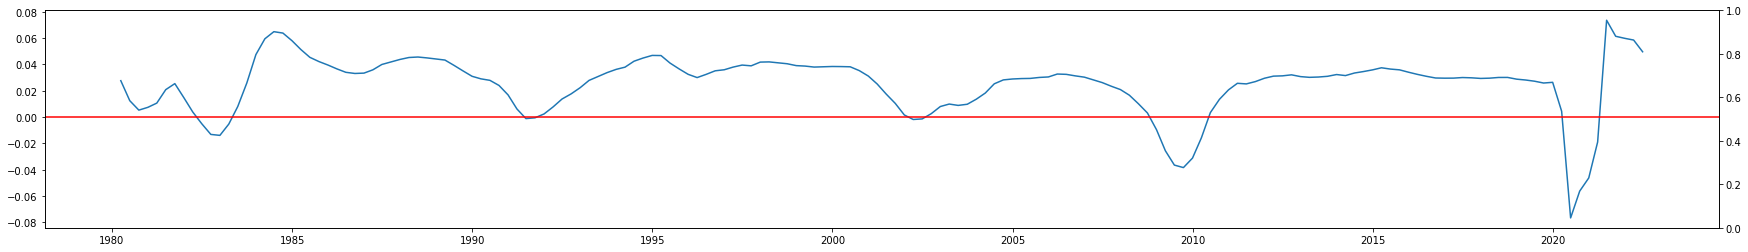

In [282]:
USALOLITONOSTSAM = pdr.DataReader('USALOLITONOSTSAM','fred','1955-01-01',end)-100

USPHCI = pdr.DataReader('USPHCI','fred','1955-01-01',end)
#USPHCI_signal = USPHCI.rolling(4).mean()-USPHCI.rolling(12*4).mean()

GDP = pdr.DataReader('USPHCI','fred','1955-01-01',end)
"""
signal = USALOLITONOSTSAM['USALOLITONOSTSAM']

Recovery = (signal<0)*(signal.pct_change(1)>0)
Expansion = (signal>0)*(signal.pct_change(1)>0)
Slowdown = (signal>0)*(signal.pct_change(1)<0)
Recession = (signal<0)*(signal.pct_change(1)<0)
"""
#combined_leading = pd.concat([cli_df_USA['Value']-100,USALOLITONOSTSAM],axis=1)
#combined_leading = pd.concat([cli_df_USA['Value'],USALOLITONOSTSAM+100],axis=1)
combined_leading = pd.concat([USPHCI,GDP],axis=1)

#signal = combined_leading.mean(axis=1)
#signal = combined_leading.mean(axis=1).asfreq('d').interpolate().asfreq('q')
#signal = combined_leading.mean(axis=1).asfreq('d').interpolate().resample('Q').mean()
modified = combined_leading.mean(axis=1).asfreq('d').interpolate().resample('Q').mean()

#QTR_SMA = cli_df_USA['Value'].rolling(3).mean()

fig, ax1 = plt.subplots( figsize=(30,4) )


#plt.plot(signal1)

ax2 = ax1.twinx()

signal = GDP.asfreq('D').interpolate().resample('Q').mean().pct_change(4)
#signal = modified.pct_change(4)

ST_SMA = signal.rolling(4).mean()
LT_SMA = signal.rolling(4*4).mean()
#signal = ST_SMA - LT_SMA
#signal_ = ST_SMA-LT_SMA

ax1.plot(signal)
#ax2.plot(signal_)

ax1.axhline(y = 0, color = 'r', linestyle = '-')

#troughs
troughs = signal.rolling(4*4).min()
#plt.plot(troughs)
#troughs = trough

#peaks
peaks = signal.rolling(4*4).max()
#plt.plot(peaks)
#peaks = peak

#plt.plot(combined_leading)
#plt.plot(signal_MACD)
#plt.show()

In [254]:
#cli_range_df = cli_df_USA[(cli_df_USA.index<=today) & (cli_df_USA.index>=past)]

In [255]:
#plt.plot(USPHCI.pct_change())

In [256]:
"""
slowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1))& (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak'])# & (business_cycle['signal']!=business_cycle['troughs'])#
np.sum(slowdown)
"""

"\nslowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1))& (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak'])# & (business_cycle['signal']!=business_cycle['troughs'])#\nnp.sum(slowdown)\n"

In [288]:
business_cycle = pd.concat([signal,troughs,peaks,ST_SMA,LT_SMA],axis=1)
business_cycle.columns = ["signal","troughs","peaks","ST_SMA","LT_SMA"]

if(True):
    #expansion = (business_cycle['ST_SMA']>business_cycle['LT_SMA'])&(business_cycle['ST_SMA']>0)
    expansion = (business_cycle['signal']>business_cycle['signal'].shift(1))&(business_cycle['signal']>0)
    #expansion = (business_cycle['signal']==business_cycle['peaks'])&(business_cycle['signal']>0)
    
    #expansion = (business_cycle['ST_SMA'].pct_change()>0)&(business_cycle['signal']>0)
    
    recovery = (business_cycle['signal']>business_cycle['signal'].shift(1))&(business_cycle['signal']<0)
    #recovery = (business_cycle['ST_SMA'].pct_change()>0)&(business_cycle['signal']<0)
    
    #recession = (business_cycle['ST_SMA']>business_cycle['LT_SMA'])&(business_cycle['ST_SMA']<0)
    recession = (business_cycle['signal']<business_cycle['signal'].shift(1))&(business_cycle['signal']<0)
    #recession = (business_cycle['ST_SMA'].pct_change()<0)&(business_cycle['signal']<0)
    slowdown = (business_cycle['signal']<business_cycle['signal'].shift(1))&(business_cycle['signal']>0)
    #slowdown = (business_cycle['signal']<business_cycle['peaks'])&(business_cycle['signal']>0)
    #slowdown = (business_cycle['ST_SMA'].pct_change()<0)&(business_cycle['signal']>0)

if(False):
    expansion = (business_cycle['ST_SMA']>business_cycle['LT_SMA']) #& (business_cycle['signal']==business_cycle['peak'])
    #recovery = (business_cycle['ST_SMA']>business_cycle['ST_SMA'].shift(1)) & (business_cycle['signal']>business_cycle['troughs']) & (business_cycle['ST_SMA']<business_cycle['LT_SMA']) #& (business_cycle['ST_SMA']<business_cycle['LT_SMA'])
    recovery = (expansion==False) & (business_cycle['signal']>business_cycle['troughs'])
    expansion = (expansion) & (recovery==False) 
    #expansion = (business_cycle['ST_SMA']>business_cycle['LT_SMA'])
    #slowdown = (combined['ST_SMA']>combined['LT_SMA']) & (combined['signal']<combined['peak'])

    #slowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1)) & (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak']) & (business_cycle['signal']!=business_cycle['troughs'])
    slowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1))& (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak'])# & (business_cycle['signal']!=business_cycle['troughs'])#
    np.sum(slowdown)
    #recession = (combined['ST_SMA']<combined['LT_SMA']) & (combined['signal']==combined['troughs'])
    #if yesterday's difference less than today's difference
    #recession = (business_cycle['ST_SMA']<business_cycle['LT_SMA']) & (business_cycle['signal']==business_cycle['troughs']) & (business_cycle['signal']<business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].pct_change())>abs(business_cycle['signal'].pct_change().shift(1)))

    #recession = ((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1)) & (business_cycle['signal'] < business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].diff())>(abs(business_cycle['signal'].shift(1).diff()))**2) & (business_cycle['signal']<business_cycle['ST_SMA']) & (((business_cycle['signal']<business_cycle['ST_SMA']) & ((business_cycle['ST_SMA']-business_cycle['signal'])>(((business_cycle['ST_SMA']-business_cycle['signal']).shift(1))))))
    recession = ((business_cycle['signal']==business_cycle['troughs'])&((business_cycle['ST_SMA']-business_cycle['signal'])/(business_cycle['peak']-business_cycle['signal'])>.25)) #\
    """
    &\
    ((business_cycle['signal'].pct_change()/business_cycle['signal'].pct_change().shift(1))>1.5)
    """
    """
    &\
    ((business_cycle['LT_SMA']-business_cycle['ST_SMA'])>(business_cycle['LT_SMA']-business_cycle['ST_SMA']).shift(1))\
    &((business_cycle['ST_SMA']-business_cycle['signal'])>(business_cycle['ST_SMA']-business_cycle['signal']).shift(1))\
    &((business_cycle['peak']-business_cycle['LT_SMA'])>(business_cycle['peak']-business_cycle['LT_SMA']).shift(1))\
    &((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))\
    """
    #&(business_cycle['signal'].pct_change()<-.25)

    #& ((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1)) & (business_cycle['signal'] < business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].diff())>(abs(business_cycle['signal'].shift(1).diff()))**2) & (business_cycle['signal']<business_cycle['ST_SMA']) & (((business_cycle['signal']<business_cycle['ST_SMA']) & ((business_cycle['ST_SMA']-business_cycle['signal'])>(((business_cycle['ST_SMA']-business_cycle['signal']).shift(1))))))

    #recession = (business_cycle['troughs']<business_cycle['troughs'].shift(1))&(abs(business_cycle['troughs'].pct_change())>abs(business_cycle['troughs'].pct_change()).shift(1))
    #((business_cycle['signal']<business_cycle['ST_SMA'])&(abs(business_cycle['signal']<business_cycle['ST_SMA']))>(abs(business_cycle['LT_SMA']-business_cycle['ST_SMA'])))

    #recession = (business_cycle['ST_SMA']<business_cycle['LT_SMA']) & (business_cycle['signal']<business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].pct_change())>abs(2*business_cycle['signal'].pct_change().shift(1))) & (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1)) & (abs(business_cycle['ST_SMA'].pct_change())>abs(business_cycle['ST_SMA'].pct_change().shift(1))) \
    #& ((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))
    slowdown = (slowdown) & (slowdown!=recession) & (slowdown!=recovery) & (slowdown!=expansion)

business_cycle = pd.concat([business_cycle,recovery,expansion,slowdown,recession],axis=1)
business_cycle = business_cycle.dropna()
business_cycle.columns = [*business_cycle.columns[0:5],'recovery','expansion','slowdown','recession']
#slowdown = combined['ST_SMA']<combined['LT_SMA']
    


In [289]:
"""
#The LEI Index YoY changes are positive and above long-term trends
#Expansion = (cli_df_USA['Value']>LT_SMA) * (ST_SMA.pct_change()>0) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))

#***
#Expansion = (signal>LT_SMA) * (ST_SMA.pct_change()>0) * (signal>signal.shift(1))

#Expansion = (signal>LT_SMA) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# * (signal>signal.shift(1))
Expansion =  (signal>signal.shift(1)) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# *
np.sum(Expansion)

#Recovery = (cli_df_USA['Value'] > troughs) * (cli_df_USA['Value']<LT_SMA) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))
Recovery = (signal > troughs) * (signal>signal.shift(1)) * (Expansion==0) * (signal<LT_SMA)
np.sum(Recovery)

print(np.sum(Recovery*Expansion))

Declining = ((Recovery!=1)*(Expansion!=1))
print(np.sum(Declining))

###Recession

today_minus_yesterday = signal-signal.shift(1)

yesterday_minus_today = signal.shift(1)-signal

#rapidly declines to a troughs

#today is less than yesterday
#at an accelerating pace OR
    #yesterday was receding
#Recession = ((today_minus_yesterday<0) * ((np.abs(today_minus_yesterday)>np.abs(today_minus_yesterday.shift(1))).values|(today_minus_yesterday.shift(1)<0).values)) # * (signal == troughs))
Recession = ((today_minus_yesterday<0) * ((np.abs(today_minus_yesterday)>np.abs(today_minus_yesterday.shift(1))).values)) * (signal == troughs)

print(np.sum(Recession))

#prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]

Not_recession = (Recession==0)*(Recovery==0)*(Expansion==0)#*(signal<peak)
Slowdown = Not_recession
print(Slowdown)

#Slowdown = (ST_SMA < peaks)
#recession = Recession
#slowdown = Slowdown
#recovery = Recovery
#expansion = Expansion
"""

"\n#The LEI Index YoY changes are positive and above long-term trends\n#Expansion = (cli_df_USA['Value']>LT_SMA) * (ST_SMA.pct_change()>0) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))\n\n#***\n#Expansion = (signal>LT_SMA) * (ST_SMA.pct_change()>0) * (signal>signal.shift(1))\n\n#Expansion = (signal>LT_SMA) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# * (signal>signal.shift(1))\nExpansion =  (signal>signal.shift(1)) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# *\nnp.sum(Expansion)\n\n#Recovery = (cli_df_USA['Value'] > troughs) * (cli_df_USA['Value']<LT_SMA) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))\nRecovery = (signal > troughs) * (signal>signal.shift(1)) * (Expansion==0) * (signal<LT_SMA)\nnp.sum(Recovery)\n\nprint(np.sum(Recovery*Expansion))\n\nDeclining = ((Recovery!=1)*(Expansion!=1))\nprint(np.sum(Declining))\n\n###Recession\n\ntoday_minus_yesterday = signal-signal.shift(1)\n\nyesterday_minus_today = si

In [290]:
"""
np.sum(\
((business_cycle['LT_SMA']-business_cycle['ST_SMA'])>(business_cycle['LT_SMA']-business_cycle['ST_SMA']).shift(1))\
&((business_cycle['ST_SMA']-business_cycle['signal'])>(business_cycle['ST_SMA']-business_cycle['signal']).shift(1))\
&((business_cycle['peak']-business_cycle['LT_SMA'])>(business_cycle['peak']-business_cycle['LT_SMA']).shift(1))\
&((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))\
      )
"""

"\nnp.sum(((business_cycle['LT_SMA']-business_cycle['ST_SMA'])>(business_cycle['LT_SMA']-business_cycle['ST_SMA']).shift(1))&((business_cycle['ST_SMA']-business_cycle['signal'])>(business_cycle['ST_SMA']-business_cycle['signal']).shift(1))&((business_cycle['peak']-business_cycle['LT_SMA'])>(business_cycle['peak']-business_cycle['LT_SMA']).shift(1))&((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))      )\n"

In [291]:
#(business_cycle['signal']<business_cycle['ST_SMA']) & (business_cycle['ST_SMA']-business_cycle['signal'])>(2*((business_cycle['ST_SMA']-business_cycle['signal']).shift(1)))

In [292]:
#plt.plot(business_cycle['signal'].pct_change())

In [293]:
#business_cycle['signal'][business_cycle['signal'].index>'2020-01-01'].pct_change().head(30)

In [294]:
fig, ax1 = plt.subplots( figsize=(30,4) )
#plt.plot(cli_df_USA['Value'])
ax1.plot(business_cycle['signal'])

ax1.plot(business_cycle['peaks'])
ax1.plot(business_cycle['troughs'])
ax1.plot(business_cycle['ST_SMA'])
ax1.plot(business_cycle['LT_SMA'])
ax1.axhline(y = 0, color = 'black', linestyle = '--')
ax1.legend(['current','peaks','troughs','ST_SMA','LT_SMA'],loc=1)
#plt.legend(['current','ST_SMA','LT_SMA'],loc=1)

ax2 = ax1.twinx()

trans = mtransforms.blended_transform_factory(ax2.transData, ax2.transAxes)

ax2.vlines((recovery == 1).index[(recovery == 1).values],color='blue', alpha=0.33, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recovery')
ax2.vlines((expansion == 1).index[(expansion == 1).values],color='green', alpha=0.33, ymin=0, ymax=1, colors=None, linestyles='solid',label='Expansion')
ax2.vlines((slowdown == 1).index[(slowdown == 1).values],color='orange', alpha=0.33, ymin=0, ymax=1, colors=None, linestyles='solid',label='Slowdown')
ax2.vlines((recession == 1).index[(recession == 1).values],color='red', alpha=0.33, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recession')

ax2.legend(['Recovery','Expansion','Slowdown','Recession'],loc=3)
plt.show()

In [295]:
fig, ax1 = plt.subplots( figsize=(30,4) )
#plt.plot(cli_df_USA['Value'])
ax1.plot(business_cycle['signal'].reindex(combined_indexes_sectors_return_pvt_df.index))

ax1.plot(business_cycle['peaks'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.plot(business_cycle['troughs'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.plot(business_cycle['ST_SMA'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.plot(business_cycle['LT_SMA'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.axhline(y = 0, color = 'black', linestyle = '--')
ax1.legend(['current','peaks','troughs','ST_SMA','LT_SMA'],loc=1)
#plt.legend(['current','ST_SMA','LT_SMA'],loc=1)

ax2 = ax1.twinx()

trans = mtransforms.blended_transform_factory(ax2.transData, ax2.transAxes)

"""
ax2.fill_between(business_cycle.index, 0, 1, where=Recovery['USPHCI'].reindex(business_cycle.index) == 1,facecolor='blue', alpha=0.5, transform=trans)
ax2.fill_between(business_cycle.index, 0, 1, where=Expansion['USPHCI'].reindex(business_cycle.index) == 1,facecolor='orange', alpha=0.5, transform=trans)
ax2.fill_between(business_cycle.index, 0, 1, where=Slowdown['USPHCI'].reindex(business_cycle.index) == 1,facecolor='green', alpha=0.5, transform=trans)
ax2.fill_between(business_cycle.index, 0, 1, where=Recession['USPHCI'].reindex(business_cycle.index) == 1,facecolor='red', alpha=0.5, transform=trans)
"""   
 
ax2.vlines((recovery.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(recovery.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='blue', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recovery')
ax2.vlines((expansion.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(expansion.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='green', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Expansion')
ax2.vlines((slowdown.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(slowdown.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='orange', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Slowdown')
ax2.vlines((recession.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(recession.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='red', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recession')

ax2.legend(['Recovery','Expansion','Slowdown','Recession'],loc=3)
plt.show()

In [296]:
plt.plot(business_cycle[['peaks','troughs']])
plt.plot(business_cycle[['signal']])
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()

In [297]:
np.sum(business_cycle.iloc[:,-4:])

recovery      7
expansion    69
slowdown     72
recession     7
dtype: int64

In [298]:
np.sum(np.sum(business_cycle.iloc[:,-4:]))

155

In [299]:
#Slowdown = (ST_SMA < peak)
#np.sum(Slowdown)

In [300]:
"""
Slowdown = (ST_SMA.pct_change()<0) * (cli_df_USA['Value']<peaks)# (ST_SMA<LT_SMA)
Slowdown = (signal.pct_change()<0) * (signal<peak)# (ST_SMA<LT_SMA)
np.sum(Slowdown)
"""

"\nSlowdown = (ST_SMA.pct_change()<0) * (cli_df_USA['Value']<peaks)# (ST_SMA<LT_SMA)\nSlowdown = (signal.pct_change()<0) * (signal<peak)# (ST_SMA<LT_SMA)\nnp.sum(Slowdown)\n"

In [301]:
#plt.plot(prior_recession * Slowdown['USPHCI'])

In [302]:
"""
print(np.sum(Slowdown))

while (np.sum(prior_recession * Slowdown['USPHCI'])>0):
     
    positions = prior_recession * Slowdown['USPHCI']
    
    #print(np.where(positions))
    
    Recession.iloc[positions] = True
    Slowdown.iloc[positions] = False

    prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]
    Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)
    #positions = np.intersect1d(prior_recession,Slowdown)
    #Recession.iloc[positions] = True
    #Slowdown.iloc[positions] = False
    #prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]
    #Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)
    
    
    
    #print(np.sum(Slowdown))

    
"""

"\nprint(np.sum(Slowdown))\n\nwhile (np.sum(prior_recession * Slowdown['USPHCI'])>0):\n     \n    positions = prior_recession * Slowdown['USPHCI']\n    \n    #print(np.where(positions))\n    \n    Recession.iloc[positions] = True\n    Slowdown.iloc[positions] = False\n\n    prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]\n    Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)\n    #positions = np.intersect1d(prior_recession,Slowdown)\n    #Recession.iloc[positions] = True\n    #Slowdown.iloc[positions] = False\n    #prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]\n    #Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)\n    \n    \n    \n    #print(np.sum(Slowdown))\n\n    \n"

In [303]:
"""
list1 = [-1, -1, 1, 1, 1, -1, 1]
count_dups = [sum(1 for _ in group) for _, group in groupby(list1)]
print(count_dups)
"""

#business_cycle = pd.concat([signal,Recovery,Expansion,Slowdown,Recession],axis=1)
#business_cycle.columns=['Leading','Recovery','Expansion','Slowdown','Recession']
#business_cycle = business_cycle.reindex(peak.dropna().index).dropna()

"""
for c_ in range(1,len(business_cycle.iloc[:,1:].columns)+1):
    c = business_cycle.iloc[:,1:].columns[c_-1]
    business_cycle[c][business_cycle[c]==True] = c_
    business_cycle[c][business_cycle[c]==False] = np.nan

repeats = business_cycle.iloc[:,1:].bfill(axis=1).iloc[:, 0]

#list1 = [-1, -1, 1, 1, 1, -1, 1]
count_dups = [sum(1 for _ in group) for _, group in groupby(repeats)]
print(count_dups)

"""

'\nfor c_ in range(1,len(business_cycle.iloc[:,1:].columns)+1):\n    c = business_cycle.iloc[:,1:].columns[c_-1]\n    business_cycle[c][business_cycle[c]==True] = c_\n    business_cycle[c][business_cycle[c]==False] = np.nan\n\nrepeats = business_cycle.iloc[:,1:].bfill(axis=1).iloc[:, 0]\n\n#list1 = [-1, -1, 1, 1, 1, -1, 1]\ncount_dups = [sum(1 for _ in group) for _, group in groupby(repeats)]\nprint(count_dups)\n\n'

In [304]:
"""
iter = 0
values = []
iterator=0
for c_ in range(0,len(count_dups)):
    c = count_dups[c_]
    #values.append()
    #c_* len(iterator)
    iterator = iterator + c - 1
    values.append(repeats[c_+iterator])
    
values_df = pd.DataFrame(values)

values_df[(values_df==3)*(values_df.shift(1)==4)] = 4
"""

'\niter = 0\nvalues = []\niterator=0\nfor c_ in range(0,len(count_dups)):\n    c = count_dups[c_]\n    #values.append()\n    #c_* len(iterator)\n    iterator = iterator + c - 1\n    values.append(repeats[c_+iterator])\n    \nvalues_df = pd.DataFrame(values)\n\nvalues_df[(values_df==3)*(values_df.shift(1)==4)] = 4\n'

In [305]:
"""
fig, ax1 = plt.subplots( figsize=(30,4) )
plt.plot(recession.reindex(combined_indexes_sectors_return_pvt_df.index))
#plt.fill_between(recession.reindex(combined_indexes_sectors_return_pvt_df.index), 0, 1, where=recession.reindex(combined_indexes_sectors_return_pvt_df.index),
    #facecolor='blue', alpha=0.5, transform=trans)
#plt.legend(loc=1)
#plt.legend(loc=3)
plt.show()
"""

"\nfig, ax1 = plt.subplots( figsize=(30,4) )\nplt.plot(recession.reindex(combined_indexes_sectors_return_pvt_df.index))\n#plt.fill_between(recession.reindex(combined_indexes_sectors_return_pvt_df.index), 0, 1, where=recession.reindex(combined_indexes_sectors_return_pvt_df.index),\n    #facecolor='blue', alpha=0.5, transform=trans)\n#plt.legend(loc=1)\n#plt.legend(loc=3)\nplt.show()\n"

In [306]:
business_cycles_sectors_indexes = pd.concat([business_cycle,combined_indexes_sectors_return_pvt_df],axis=1).dropna()

VOX       VCR       VDC       VDE       VFH       VHT  \
recovery  0.624953  0.646066  0.866267  0.910163  0.748149  0.932413   

               VIS      VGT       VAW       VNQ       VPU  
recovery  0.637022  0.55574  0.808966  0.922574  0.815743

In [334]:
from scipy import stats as st
from scipy.stats import t

for bc in ['recovery','expansion','slowdown','recession']:    
    subset = business_cycles_sectors_indexes[business_cycles_sectors_indexes[bc]==True]
    n = len(subset)
    print(bc,n)
    i_m = pd.DataFrame(subset[indexes].mean(axis=0)).T
    i_s = pd.DataFrame(subset[indexes].std(axis=0)).T
    #i_z = i_m/i_s
    i_t = (i_m)/(i_s*np.sqrt(n))
    print(i_)
    s_m = pd.DataFrame(subset[sectors].mean(axis=0)).T
    s_s = pd.DataFrame(subset[sectors].std(axis=0)).T
    #s_z = s_m/s_s
    s_t = (s_m)/(s_s*np.sqrt(n))
    s_m.columns = [dict_sectors_reverse[s] for s in s_m.columns]
    #print(pd.DataFrame(t.cdf(s_t, df=n-2),index=[bc],columns=sectors))
    display(pd.DataFrame(t.cdf(s_t, df=n-2),index=[bc],columns=sectors).style.applymap(highlight_cells, threshold=.05))
    print(s_.T.sort_values(by=0,ascending=False))
    

recovery 5
       SPTM         SPY       SLY      MDYG
0  7.556615 -124.442628  4.320948  3.274409


                               0
Energy                 -0.018275
Healthcare             -0.023206
Basic Materials        -0.029179
Real Estate            -0.033397
Utilities              -0.036147
Communication Services -0.061117
Consumer Defensive     -0.075074
Financial Services     -0.089012
Industrials            -0.100941
Consumer Cyclical      -0.103195
Technology             -0.114185
expansion 23
       SPTM         SPY       SLY      MDYG
0  7.556615 -124.442628  4.320948  3.274409


                               0
Energy                 -0.018275
Healthcare             -0.023206
Basic Materials        -0.029179
Real Estate            -0.033397
Utilities              -0.036147
Communication Services -0.061117
Consumer Defensive     -0.075074
Financial Services     -0.089012
Industrials            -0.100941
Consumer Cyclical      -0.103195
Technology             -0.114185
slowdown 32
       SPTM         SPY       SLY      MDYG
0  7.556615 -124.442628  4.320948  3.274409


                               0
Energy                 -0.018275
Healthcare             -0.023206
Basic Materials        -0.029179
Real Estate            -0.033397
Utilities              -0.036147
Communication Services -0.061117
Consumer Defensive     -0.075074
Financial Services     -0.089012
Industrials            -0.100941
Consumer Cyclical      -0.103195
Technology             -0.114185
recession 5
       SPTM         SPY       SLY      MDYG
0  7.556615 -124.442628  4.320948  3.274409


                               0
Energy                 -0.018275
Healthcare             -0.023206
Basic Materials        -0.029179
Real Estate            -0.033397
Utilities              -0.036147
Communication Services -0.061117
Consumer Defensive     -0.075074
Financial Services     -0.089012
Industrials            -0.100941
Consumer Cyclical      -0.103195
Technology             -0.114185


In [308]:
np.sum(business_cycles_sectors_indexes.reindex(business_cycles_sectors_indexes.index).iloc[:,5:9].sum(axis=0))

65